In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


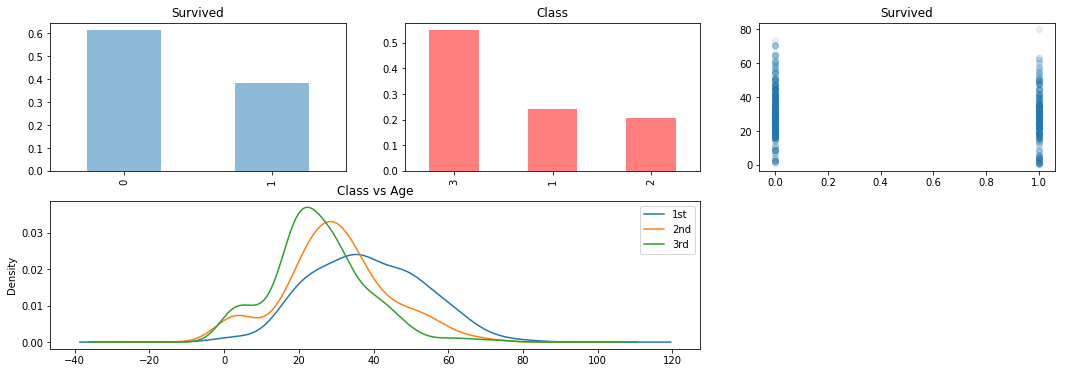

In [3]:
fig = plt.figure(figsize = (18, 6))

#df.Survived.value_counts(normalize = True).plot(kind = 'bar', aplha = 0.1)
#plt.title("Survived")

plt.subplot2grid((2, 3), (0, 0))
df.Survived.value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5)
plt.title("Survived")

plt.subplot2grid((2, 3), (0, 1))
df.Pclass.value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5, color = 'red')
#plt.bar(df.Survived, df.Pclass, alpha = 0.1)
plt.title("Class")

plt.subplot2grid((2, 3), (0, 2))
plt.scatter(df.Survived, df.Age, alpha = 0.1)
plt.title("Survived")

plt.subplot2grid((2, 3), (1, 0), colspan = 2)
for x in [1, 2, 3]:
    df.Age[df.Pclass == x].plot(kind = 'kde')
plt.title("Class vs Age")
plt.legend(("1st", "2nd", "3rd"))

plt.show()

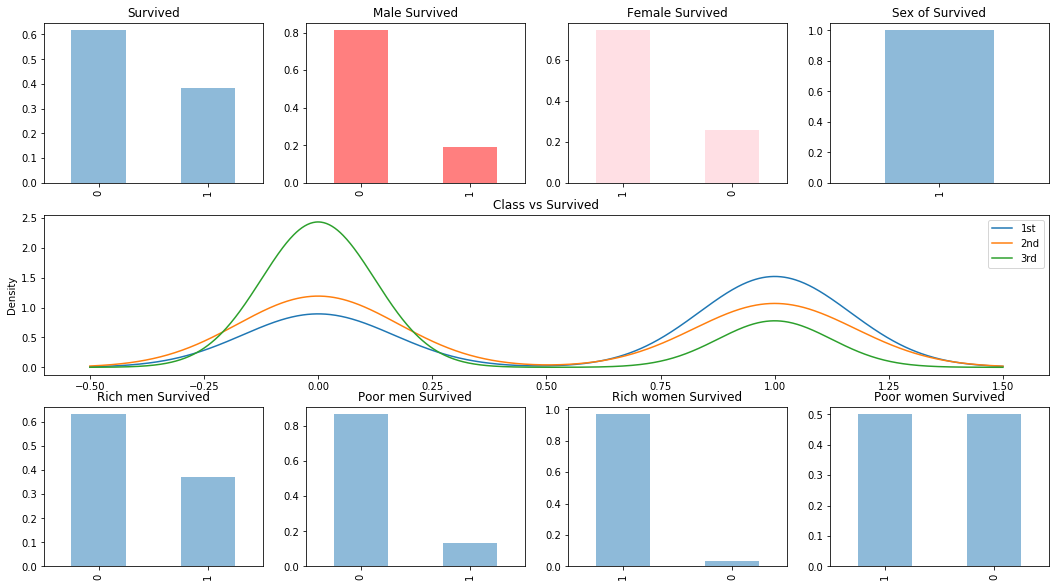

In [4]:
fig = plt.figure(figsize = (18, 10))

plt.subplot2grid((3, 4), (0, 0))
df.Survived.value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5)
plt.title("Survived")

plt.subplot2grid((3, 4), (0, 1))
df.Survived[df.Sex == 'male'].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5, color = 'red')
plt.title("Male Survived")

plt.subplot2grid((3, 4), (0, 2))
df.Survived[df.Sex == 'female'].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5, color = 'pink')
plt.title("Female Survived")

plt.subplot2grid((3, 4), (0, 3))
df.Survived[df.Survived == 1].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5)
plt.title("Sex of Survived")

plt.subplot2grid((3, 4), (1, 0), colspan = 4)
for x in [1, 2, 3]:
    df.Survived[df.Pclass == x].plot(kind = 'kde')
plt.title("Class vs Survived")
plt.legend(("1st", "2nd", "3rd"))

plt.subplot2grid((3, 4), (2, 0))
df.Survived[(df.Sex == 'male') & (df.Pclass == 1)].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5)
plt.title("Rich men Survived")

plt.subplot2grid((3, 4), (2, 1))
df.Survived[(df.Sex == 'male') & (df.Pclass == 3)].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5)
plt.title("Poor men Survived")

plt.subplot2grid((3, 4), (2, 2))
df.Survived[(df.Sex == 'female') & (df.Pclass == 1)].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5)
plt.title("Rich women Survived")

plt.subplot2grid((3, 4), (2, 3))
df.Survived[(df.Sex == 'female') & (df.Pclass == 3)].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5)
plt.title("Poor women Survived")

plt.show()

In [5]:
def clean_data(data):
    
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())
    
    data.loc[data["Sex"] == 'male', 'Sex'] = 0
    data.loc[data["Sex"] == 'female', 'Sex'] = 1
    
    data["Embarked"] = data["Embarked"].fillna('S')
    data.loc[data["Embarked"] == 'S', 'Embarked'] = 0
    data.loc[data["Embarked"] == 'C', 'Embarked'] = 1
    data.loc[data["Embarked"] == 'Q', 'Embarked'] = 2
    
    return data


In [6]:
import utils
from sklearn import linear_model

In [30]:
train = pd.read_csv("train.csv")

train = clean_data(train)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [32]:
target = train["Survived"].values
features = train[["Pclass", "Age", "Sex", "SibSp", "Parch"]].values

In [33]:
classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(features, target)

/home/dishebh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
classifier_.score(features, target)

0.7934904601571269

In [29]:
from sklearn import tree

In [41]:
decision_tree = tree.DecisionTreeClassifier(random_state = 1)
decision_tree.fit(features, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [57]:
decision_tree.score(features, target)

0.9169472502805837

In [50]:
survived = decision_tree.predict (titanic_test)

In [49]:
acc_decision_tree = round(decision_tree.score(features, target) * 100, 2)
acc_decision_tree

91.69

In [51]:
test["survived"] = survived

In [54]:
test.shape

(300, 15)

In [56]:
test.to_csv ("Test_titanic.csv")

In [15]:
from sklearn import model_selection

In [16]:
scores = model_selection.cross_val_score(decision_tree, features, target, scoring = 'accuracy', cv = 50)

In [17]:
scores

array([0.77777778, 0.72222222, 0.77777778, 0.88888889, 0.77777778,
       0.77777778, 0.61111111, 0.77777778, 0.77777778, 0.88888889,
       0.77777778, 0.72222222, 0.77777778, 0.77777778, 0.77777778,
       0.77777778, 0.94444444, 0.83333333, 0.83333333, 0.88888889,
       0.94444444, 0.72222222, 0.83333333, 0.77777778, 0.72222222,
       0.83333333, 0.83333333, 0.88888889, 0.55555556, 0.83333333,
       0.77777778, 0.66666667, 0.88888889, 0.94444444, 0.83333333,
       0.72222222, 0.66666667, 0.72222222, 0.83333333, 0.88888889,
       0.88888889, 0.83333333, 0.76470588, 0.76470588, 0.94117647,
       0.76470588, 0.82352941, 0.82352941, 0.82352941, 0.875     ])

In [18]:
scores.mean()

0.8016176470588234

In [34]:
test = pd.read_csv("Test.csv")

In [35]:
test.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0.0,0.0,PC 17474,26.3875,E25,S,5,NaN,"Brooklyn, NY"
1,3.0,"Sage, Miss. Constance Gladys",female,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
2,1.0,"Rood, Mr. Hugh Roscoe",male,NaN,0.0,0.0,113767,50.0000,A32,S,NaN,NaN,"Seattle, WA"
3,2.0,"Gillespie, Mr. William Henry",male,34.0,0.0,0.0,12233,13.0000,NaN,S,NaN,NaN,"Vancouver, BC"
4,2.0,"Collander, Mr. Erik Gustaf",male,28.0,0.0,0.0,248740,13.0000,NaN,S,NaN,NaN,"Helsinki, Finland Ashtabula, Ohio"


In [36]:
def clean_data_test(data):
    
    data["fare"] = data["fare"].fillna(data["fare"].dropna().median())
    data["age"] = data["age"].fillna(data["age"].dropna().median())
    
    data.loc[data["sex"] == 'male', 'sex'] = 0
    data.loc[data["sex"] == 'female', 'sex'] = 1
    
    data["embarked"] = data["embarked"].fillna('S')
    data.loc[data["embarked"] == 'S', 'embarked'] = 0
    data.loc[data["embarked"] == 'C', 'Embarked'] = 1
    data.loc[data["embarked"] == 'Q', 'Embarked'] = 2
    
    return data

In [37]:
titanic_test = clean_data_test(test)

In [43]:
titanic_test = titanic_test[["pclass", "age", "sex", "sibsp", "parch"]].values

#decision_tree_test = tree.DecisionTreeClassifier(random_state = 1)
decision_tree.predict(titanic_test)

/home/dishebh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [44]:
titanic_test

array([[ 1., 36.,  0.,  0.,  0.],
       [ 3., 28.,  1.,  8.,  2.],
       [ 1., 28.,  0.,  0.,  0.],
       ...,
       [ 3., 13.,  0.,  4.,  2.],
       [ 3., 28.,  0.,  2.,  0.],
       [ 3., 28.,  1.,  0.,  0.]])